## Ejercicio: Los Nacimientos en EEUU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#El read csv separa perfectamente los datos que estan separados por coma, lo hace automaticamente. 
#de otro modo tenemos que especificar. Sigue:
births = pd.read_csv("https://raw.githubusercontent.com/argeus47/r-basic/master/data/us-births.csv") 
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [4]:
#nacimiento por Años y genero
births.pivot_table('births', #Datos de estudio
                   index='year',  #Indice es el año que va en la fila
                   columns = 'gender',  #Genero dividido en columnas y hace 2 filas
                   aggfunc = 'sum') #Sumando todos por año

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [5]:
births['decade'] = (births['year']//10)*10 #creando una columna de nombre decade
births.head() #Verificando la nueva columna

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [6]:
#nacimiento por decada y genero
births.pivot_table('births',
                  index = 'decade',
                  columns = 'gender',
                  aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [7]:
#Para mejorar las graficas y sean mas bonitas
%matplotlib inline 
import seaborn as sb #Para llamar colores bonitos
sb.set() #Configura las tonalidades, los colores de los graficos

<Figure size 1080x1080 with 0 Axes>

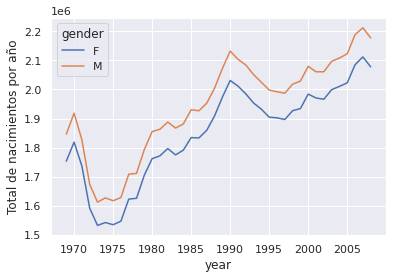

In [8]:
#Graficando
plt.figure(figsize=(15,15)) #Agregando tamaño de grafico
births.pivot_table('births',
                  index ='year',
                  columns = 'gender',
                  aggfunc = 'sum').plot() #El .plot es para graficar
plt.ylabel('Total de nacimientos por año') #Agregando etiqueta en Y
plt.show() #Para que muestre la grafica

In [9]:
#Eliminando valores mal escritos y NA
#Metodo 1 con los quartiles de forma directa
quartiles = np.percentile(births['births'], [25,50,75])
print(quartiles)

print(' ')

#Metodo 2 filtrando valores o factores extraños
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75*IQR #Se analiza desde el punto de vista de los datos y filtrar informaciones no correctas

#Filtrando dinamicamente los datos
                        #Me quedo con los que estan por encima de la mediana,
                                    # - 5 veces de la desviación tipica.
births = births.query('(births>@med - 5*@sig) & (births < @med + 5*@sig)')
print(births.shape)
births['day'] = births['day'].astype(int) #Convirtiendo en numero entero el valor de dia
births.head()

[4358.  4814.  5289.5]
 
(14610, 6)


<ipython-input-9-b11bcb874bdb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int) #Convirtiendo en numero entero el valor de dia


,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [10]:
#Otra forma de convertir los valores en int
x1 = births.loc[:, 'day'] = births['day'].astype(int)
x1.head()

/home/arturo/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0    1
1    1
2    2
3    2
4    3
Name: day, dtype: int64

In [12]:
#formato muy comun cuando se trata de fechas
#Formato numerico que aglutina toda la numeración
births.index = pd.to_datetime(10000*births.year+ #Multiplica el año por 10mil y suma por la siguiente columna
                              100*births.month+ #Multiplica el mes por 100 y suma por la siguiente columna
                              births.day, #finaliza la suma
                              format = '%Y%m%d') #Format para indicar año completo,mes y dia.
                                                 #Ver siguiente linea

births.head() #Al hacer el codigo pasado da como resultado la fecha bien organizada

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [13]:
#Añadiendo la columna para saber que dia de la semana es (recordando que la semana inicia de domingo en EEUU)
births['dayofweek'] = births.index.dayofweek
births.head()

<ipython-input-13-9fdb9459f332>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [14]:
#Tabla por dia de la semana vs decada, resultados la media por decada.
births.pivot_table('births',
                  index = 'dayofweek',
                  columns = 'decade',
                  aggfunc = 'mean')

#Con esta nueva tabla se puede observar que la decada de los 90 y 2mil no aparece mas es porque
#tenia demasiados NA y fueron eliminados.

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


<ipython-input-15-33c3e02ca4cd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['',"lun", "mart", "mier", "juev", "vier", "sab", "dom"])


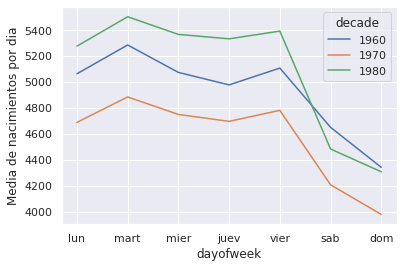

In [15]:
#Grafico para saber que dia de la semana tiene menos ancimientos
births.pivot_table('births',
                  index = 'dayofweek',
                  columns = 'decade',
                  aggfunc = 'mean').plot()
#plt.gca para agregar las etiquetas al grafico actual
plt.gca().set_xticklabels(['', #Por alguna estraña razon necesita el primero vacio para que coloque
                               #Los dias de forma correcta, si no va aparecer sin lunes y un dia menos.
                               #(Verificar porque sucede eso)
                           "lun", "mart", "mier", "juev", "vier", "sab", "dom"])
plt.ylabel('Media de nacimientos por dia')
plt.show()

#Con esta nueva grafica se puede observar que la decada de los 90 y 2mil no aparece mas es porque
#tenia demasiados NA y fueron eliminados.

In [16]:
#Filtrando media de nacimientos por mes y dia del año
births_by_date = births.pivot_table('births', 
                                    [births.index.month,
                                     births.index.day],
                                     aggfunc = 'mean')
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [17]:
#Para evitar algun tipo de error en el codigo necesito adicionar el siguiente

births_by_date = births.pivot_table('births', 
                                    [births.index.month,
                                     births.index.day],
                                     aggfunc = 'mean')


                        #Creando un objeto
                        #Año bisiesto, tomando mes y dia
births_by_date.index = [pd.datetime(2020,#Creo un objeto llamado pd.datetime a partir del año 2020
                                    month,# mes sacado del index
                                    day) # dia sacado del index
                        #Para, cada par de mes y dia dentro del nombre de las filas en births_by_date.index
                        for (month, day) in births_by_date.index]

#Para entender mejor ese codigo investigar sobre lista de comprensión


births_by_date.head()

<ipython-input-17-ef36e4e92230>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2020,#Creo un objeto llamado pd.datetime a partir del año 2020


,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


In [18]:
#Otra forma de hacer el codigo anterior
#Es encesario ese codigo para poder hacer el codigo de abajo:
births_by_date = births.pivot_table('births', 
                                    [births.index.month,
                                     births.index.day],
                                     aggfunc = 'mean')

#Cambiando el codigo anterior de (lista de comprensión) para el siguiente codigo
some_list = []
for month, day in births_by_date.index:
    some_list.append(pd.datetime(2020, month, day))

births_by_date.index = some_list
births_by_date.head()

<ipython-input-18-02920691ce5f>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  some_list.append(pd.datetime(2020, month, day))


,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

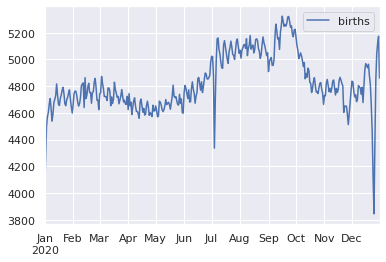

In [19]:
plt.figure(figsize=(12,4))
births_by_date.plot()
plt.show()